Estimated rate parameter (lambda): 1.6666666666666665


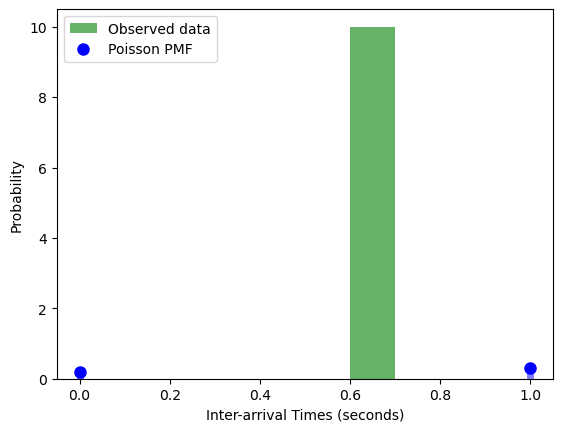

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Example data: R wave arrival times (in seconds)
r_wave_times = np.array([0.5, 1.1, 1.8, 2.5, 3.1, 3.8, 4.5, 5.2, 5.9])

# Calculate the inter-arrival times (time between consecutive R waves)
inter_arrival_times = np.diff(r_wave_times)

# Total number of R waves
N = len(r_wave_times)

# Total observation time
T = r_wave_times[-1] - r_wave_times[0]

# Estimated rate parameter (lambda)
lambda_est = N / T

# Print the estimated lambda
print(f"Estimated rate parameter (lambda): {lambda_est}")

# Generate Poisson distribution with estimated lambda
x = np.arange(0, max(inter_arrival_times) + 1)
poisson_pmf = poisson.pmf(x, lambda_est)

# Plot the observed inter-arrival times and Poisson distribution
plt.hist(inter_arrival_times, bins=len(x)-1, density=True, alpha=0.6, color='g', label='Observed data')
plt.plot(x, poisson_pmf, 'bo', ms=8, label='Poisson PMF')
plt.vlines(x, 0, poisson_pmf, colors='b', lw=5, alpha=0.5)
plt.xlabel('Inter-arrival Times (seconds)')
plt.ylabel('Probability')
plt.legend()
plt.show()


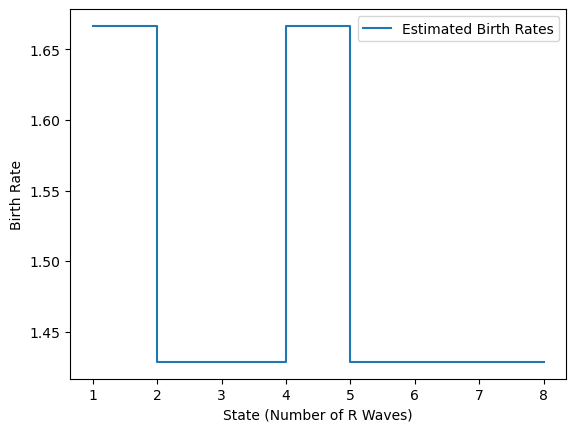

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: R wave arrival times (in seconds)
r_wave_times = np.array([0.5, 1.1, 1.8, 2.5, 3.1, 3.8, 4.5, 5.2, 5.9])

# Calculate the inter-arrival times (time between consecutive R waves)
inter_arrival_times = np.diff(r_wave_times)

# Define the states as the cumulative count of R waves
states = np.arange(1, len(r_wave_times) + 1)

# Calculate the birth rates (inverse of inter-arrival times)
birth_rates = 1 / inter_arrival_times

# Plot the birth rates
plt.step(states[:-1], birth_rates, where='post', label='Estimated Birth Rates')
plt.xlabel('State (Number of R Waves)')
plt.ylabel('Birth Rate')
plt.legend()
plt.show()


Estimated Birth Rates: [1.6666728  1.42857012 1.42857015 1.6666728  1.42857007 1.42857
 1.42857013 1.42857014]


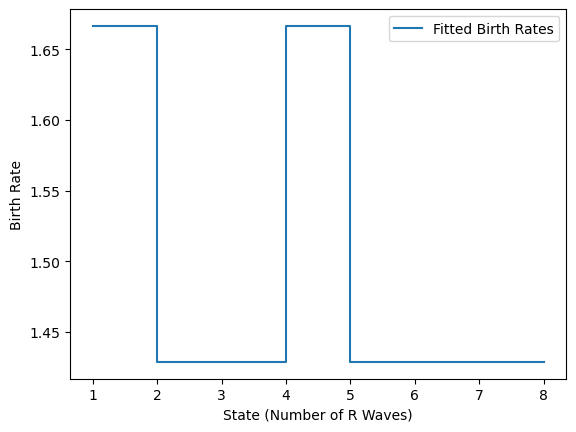

In [3]:
from scipy.optimize import minimize
import numpy as np

# Define the likelihood function for a birth process
def birth_process_likelihood(params, inter_arrival_times):
    birth_rates = params
    likelihood = 0
    for i, t in enumerate(inter_arrival_times):
        lambda_i = birth_rates[i]
        likelihood += -lambda_i * t + np.log(lambda_i)
    return -likelihood  # Return negative for minimization

# Initial guess for the birth rates
initial_guess = np.ones(len(inter_arrival_times))

# Fit the model using MLE
result = minimize(birth_process_likelihood, initial_guess, args=(inter_arrival_times,))
fitted_birth_rates = result.x

# Print the estimated birth rates
print("Estimated Birth Rates:", fitted_birth_rates)

# Plot the estimated birth rates
plt.step(states[:-1], fitted_birth_rates, where='post', label='Fitted Birth Rates')
plt.xlabel('State (Number of R Waves)')
plt.ylabel('Birth Rate')
plt.legend()
plt.show()
